In [1]:
# 확률적 경사 하강법
## SGDClassifier

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/Users/syshin/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [8]:
## 에포크와 과대/과소적합
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [9]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

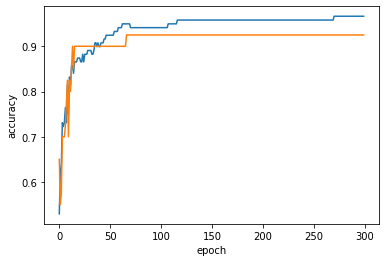

In [10]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


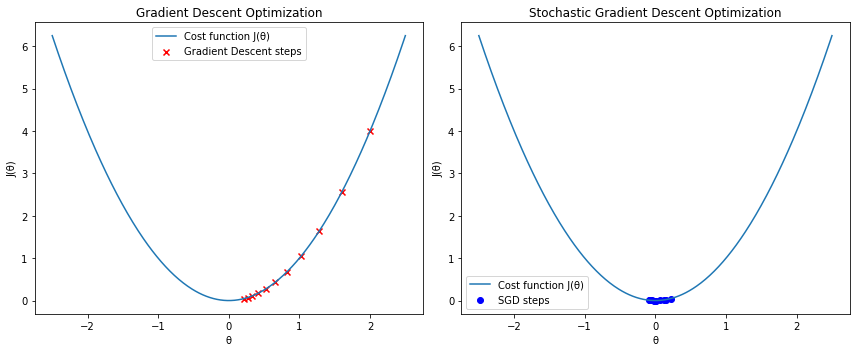

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple quadratic cost function J(theta) = theta^2
def J(theta):
    return theta**2

# Its gradient is dJ/dtheta = 2*theta
def gradient(theta):
    return 2*theta

# Initial theta
theta = 2

# Learning rate
alpha = 0.1

# Number of iterations
iterations = 10

# Lists to store the history of theta values and the cost
theta_history = [theta]
cost_history = [J(theta)]

# Gradient Descent
for _ in range(iterations):
    grad = gradient(theta)
    theta = theta - alpha * grad
    theta_history.append(theta)
    cost_history.append(J(theta))

# Plotting the cost function
theta_values = np.linspace(-2.5, 2.5, 400)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(theta_values, J(theta_values), label='Cost function J(θ)')
plt.scatter(theta_history, cost_history, c='red', marker='x', label='Gradient Descent steps')
plt.xlabel('θ')
plt.ylabel('J(θ)')
plt.legend()
plt.title('Gradient Descent Optimization')

# Plotting the path of SGD
# For simplicity, we will use the same cost function but assume noisy gradient evaluations to simulate SGD
np.random.seed(42)
noise_scale = 0.5
sgd_theta_history = [theta]
sgd_cost_history = [J(theta)]
for _ in range(iterations):
    noisy_grad = gradient(theta) + np.random.randn() * noise_scale
    theta = theta - alpha * noisy_grad
    sgd_theta_history.append(theta)
    sgd_cost_history.append(J(theta))

plt.subplot(1, 2, 2)
plt.plot(theta_values, J(theta_values), label='Cost function J(θ)')
plt.scatter(sgd_theta_history, sgd_cost_history, c='blue', marker='o', label='SGD steps')
plt.xlabel('θ')
plt.ylabel('J(θ)')
plt.legend()
plt.title('Stochastic Gradient Descent Optimization')

plt.tight_layout()
plt.show()
